In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data= pd.read_excel('iris.xls')

In [4]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Preprocessing

In [5]:
data.shape

(150, 5)

In [6]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

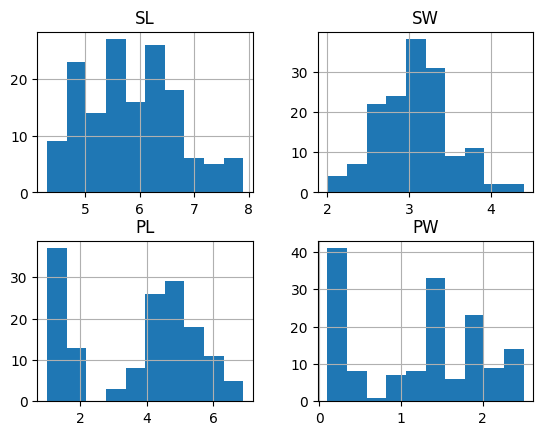

In [7]:
data.hist()
plt.show()

In [8]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [9]:
for i in ['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].median())

In [10]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<ipython-input-11-b21962c5e4fb>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,j)


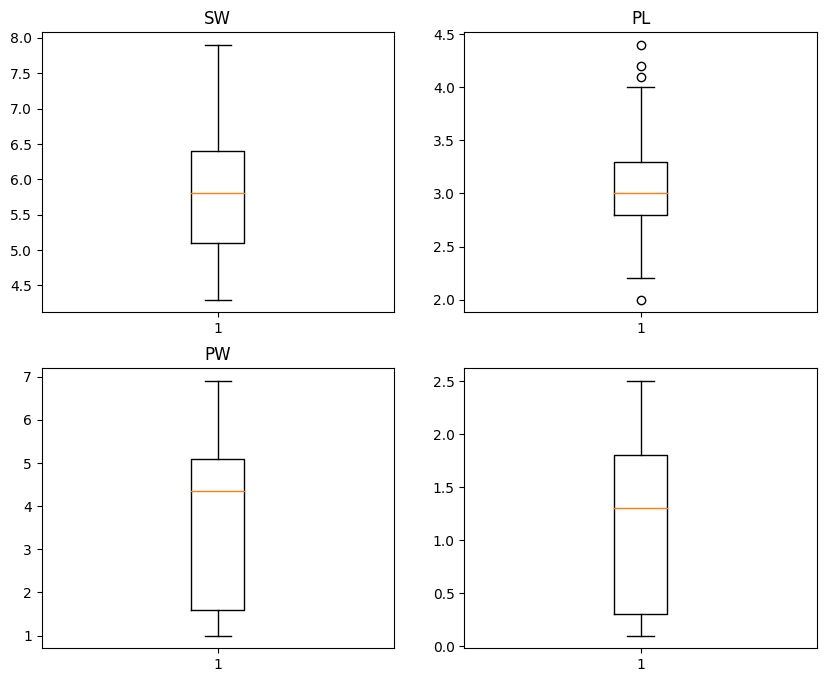

In [11]:
plt.figure(figsize=(10,8))
j=1
for i in ['SL', 'SW', 'PL', 'PW']:
    plt.title(i)
    plt.subplot(2,2,j)
    plt.boxplot(data[i])
    j=j+1
plt.show()

In [12]:
#handling outliers
for i in ['PL']:
    Q1= np.percentile(data[i],25, interpolation='midpoint')
    Q2= np.percentile(data[i],50, interpolation='midpoint')
    Q3= np.percentile(data[i],75, interpolation='midpoint')
    if Q2== data[i].median():
        IQR= Q3-Q1
        low_lim= Q1-1.5*IQR
        up_lim= Q3+1.5*IQR
        outlier =[]
        for x in data[i]:
            if(x<low_lim)or (x>up_lim):
                outlier.append(x)
        ind2= data[i]>up_lim
        ind3= data[i]<low_lim
        indicestodrop2= data.loc[ind2].index
        indicestodrop3= data.loc[ind3].index
        data= data.drop(indicestodrop2)
        data= data.drop(indicestodrop3)
    else:
        print('check again')
data.shape

<ipython-input-12-74a395ba4b1e>:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1= np.percentile(data[i],25, interpolation='midpoint')
<ipython-input-12-74a395ba4b1e>:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2= np.percentile(data[i],50, interpolation='midpoint')
<ipython-input-12-74a395ba4b1e>:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3= np.percentile(data[i],75, 

(150, 5)

#Clasiification Models

In [13]:
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [14]:
#subclass preprocessing
from sklearn.preprocessing import LabelEncoder

#logistic regression can be used for multiple classes
le = LabelEncoder()
data['Classification']= le.fit_transform(data['Classification'])

data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
X= data.drop('Classification', axis=1)
y= data['Classification']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2,random_state=42)

#Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
#for multiple class?, iterations
lr= LogisticRegression(multi_class='multinomial', max_iter=1000)

model= lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_pred))

1.0


In [21]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

#KNN

In [22]:
#kNN model!
from sklearn.neighbors import KNeighborsClassifier

metric_k = []
neighbors = np.arange(3, 11)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

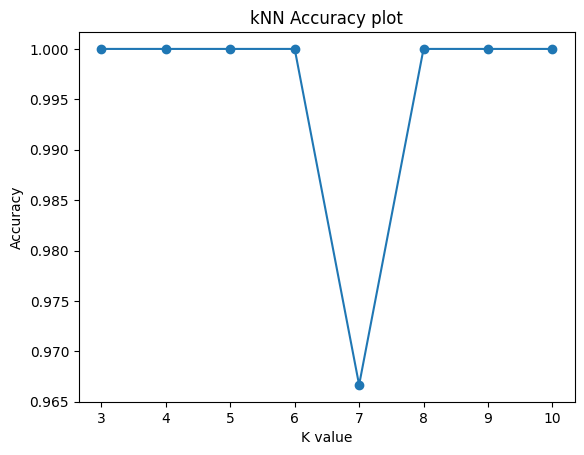

In [23]:
plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

In [24]:
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

#Svm Linear

In [26]:
from sklearn.svm import SVC
svmclf= SVC(kernel='linear')
model = svmclf.fit(X_train, y_train)
y_pred = svmclf.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

#Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

#Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

Out of the models which gives best results is SVM linear, decision trees and random forest.

Taking more number of data values, decision trees and random forest gives best results clearly.

In [ ]:
y_pred

array([418695.08304033, 541198.43288521, 418695.08304033, 418695.08304033,
       500363.98293692, 418695.08304033, 500363.98293692, 582032.8828335 ,
       622867.33278179, 500363.98293692, 418695.08304033, 377860.63309203,
       541198.43288521, 418695.08304033, 500363.98293692, 500363.98293692,
       500363.98293692, 337026.18314373, 459529.53298862, 582032.8828335 ,
       582032.8828335 , 500363.98293692, 500363.98293692])

In [ ]:
y_test

79     400000
11     500000
5      350000
85     320000
65     495000
69     300000
31     550000
46     500000
97     640000
12     500000
80     390000
81     390000
0      465000
82     390000
19     500000
71     490000
57     550000
73     320000
110    420000
43     550000
13     600000
37     486000
66     525000
Name: Price, dtype: int64

In [ ]:
print('MSE is: ', mean_squared_error(y_test, y_pred))
print('R squared value is:', r2_score(y_test, y_pred))

MSE is:  2360736941.0488067
R squared value is: 0.7087665874512326


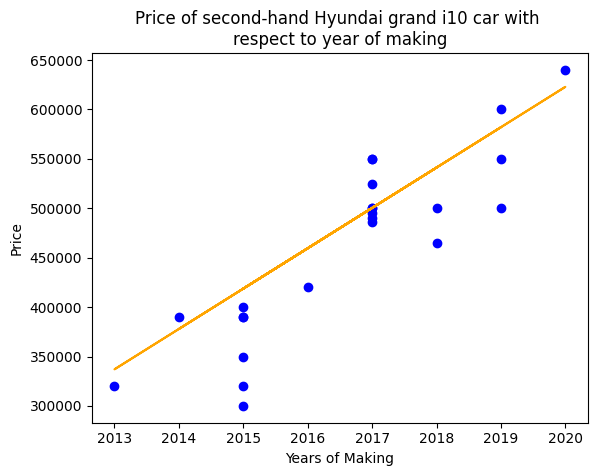

In [ ]:
#scattering and finding regression line
plt.scatter( X_test, y_test, color = 'blue' )

plt.plot( X_test, y_pred, color = 'orange' )

plt.title( '''Price of second-hand Hyundai grand i10 car with
respect to year of making''' )

plt.xlabel( 'Years of Making' )

plt.ylabel( 'Price' )

plt.show()

#Price Second hand at 2022

In [ ]:
#you need to input a 2d array, so np.array([[2022]])
#[0] for taking just a value in the dataframe

predicted_price = model.predict(np.array([[2022]]))
print('Predicted price at 2022:', predicted_price[0])

Predicted price at 2022: 704536.2326783836


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.1)  # alpha is the regularization parameter
model= lasso.fit(X_train, y_train)

# Predicting on the test set, can replace model with lasso itself
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R_squared:", r2)

Mean Squared Error: 2360738206.8636756
R_squared: 0.7087664312933915


linear regression model works a bit better than lasso regression model